In [1]:
import pandas as pd 
df_games = pd.read_csv("partidos_cebollitas_9eada58c-fb57-4224-a3f5-6d9efc881c2e.csv")
df_games['diferencia_goles'] = df_games['goles_local'] - df_games['goles_visitante']
df_games['ratio_tiros_posesion_local'] = df_games['tiros_arco_local']/df_games['posesion_local (%)']

df_games.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,diferencia_goles,ratio_tiros_posesion_local
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena,2,0.222222
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML,-4,0.200000
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena,1,0.181818
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas,-1,0.052632
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML,2,0.134615


In [2]:
from sklearn.feature_selection import SelectKBest , f_regression

# Predict and objective variables
X = df_games[['posesion_local (%)','tiros_arco_local','ratio_tiros_posesion_local']]
y = df_games['goles_local']

#Selection of the best variable
selector = SelectKBest(score_func=f_regression,k=2)
selector.fit(X,y)

#results order by relevance
scores = selector.scores_
variables = X.columns

results = pd.DataFrame({'Variables':variables,'Score':scores}).sort_values(by='Score',ascending=False)
results

,Variables,Score
0,posesion_local (%),2.844159
2,ratio_tiros_posesion_local,2.323320
1,tiros_arco_local,1.372691


In [3]:
from sklearn.tree import DecisionTreeRegressor

#trining tree decision to measuer the nivel significant
model_tree = DecisionTreeRegressor(random_state = 42)
model_tree.fit(X,y) # we are using a pair of variables defined above this cell

# importance measure by the model
importance = model_tree.feature_importances_

result_importance = pd.DataFrame({
   'Variable':variables,
   'Importance':importance}).sort_values(by='Importance', ascending=False)

result_importance

,Variable,Importance
0,posesion_local (%),0.491563
2,ratio_tiros_posesion_local,0.305755
1,tiros_arco_local,0.202683


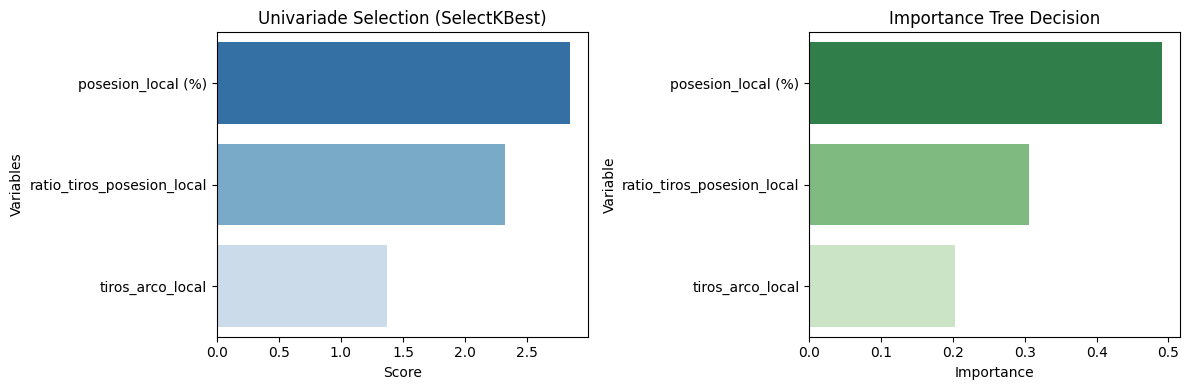

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig , ax = plt.subplots(1,2 ,figsize = (12,4))
#Graphic SelectKBest (univariate analysis)
sns.barplot(x='Score',y='Variables',data = results , ax=ax[0],palette='Blues_r')
ax[0].set_title('Univariade Selection (SelectKBest)')
#Graphic Importance (DEcision Tree)
sns.barplot(x='Importance',y='Variable',data = result_importance,ax=ax[1],palette='Greens_r')
ax[1].set_title('Importance Tree Decision')
plt.tight_layout() # optimize space
plt.show(True)